In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from env.EV_Sce_Env import EV_Sce_Env
import math
dir = 'output/LS1_2P_train_MAPPO'

env = EV_Sce_Env('LS1_2P', seed=0)

CS

In [56]:
df_cs = pd.read_csv(dir+'/CS.csv')
time = df_cs['time']
total_time = list(df_cs['time'])

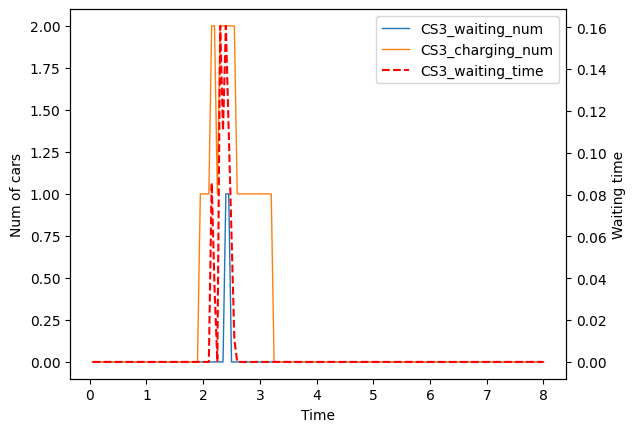

In [57]:
i = 3
columns1 = ['CS{}_waiting_num'.format(i), 'CS{}_charging_num'.format(i)]
columns2 = ['CS{}_waiting_time'.format(i)]

ax1 = plt.subplot()
l1 = ax1.plot(
    time, df_cs[columns1], label=columns1,
    linewidth=1
    )
ax1.set_ylabel('Num of cars')

ax2 = ax1.twinx()
l2 = ax2.plot(
    time, df_cs[columns2], label=columns2[0], 
    linestyle="--", c='red',
    )
ax2.set_ylabel('Waiting time')

ax1.set_xlabel('Time')
lines = l1 + l2
labs = [label.get_label() for label in lines]
# plt.grid()
plt.legend(lines, labs)

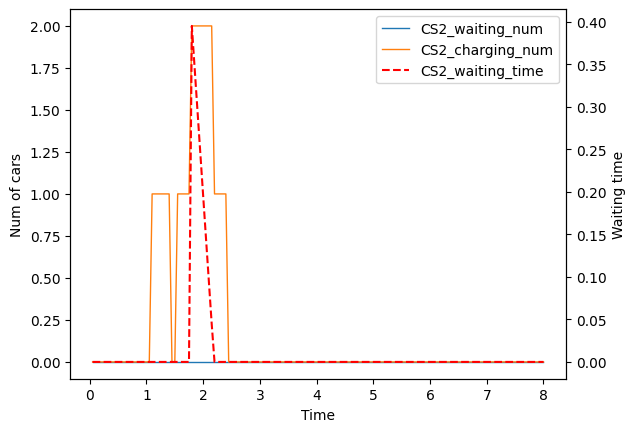

In [58]:
i = 2
columns1 = ['CS{}_waiting_num'.format(i), 'CS{}_charging_num'.format(i)]
columns2 = ['CS{}_waiting_time'.format(i)]

ax1 = plt.subplot()
l1 = ax1.plot(
    time, df_cs[columns1], label=columns1,
    linewidth=1
    )
ax1.set_ylabel('Num of cars')

ax2 = ax1.twinx()
l2 = ax2.plot(
    time, df_cs[columns2], label=columns2[0], 
    linestyle="--", c='red',
    )
ax2.set_ylabel('Waiting time')

ax1.set_xlabel('Time')
lines = l1 + l2
labs = [label.get_label() for label in lines]
# plt.grid()
plt.legend(lines, labs)

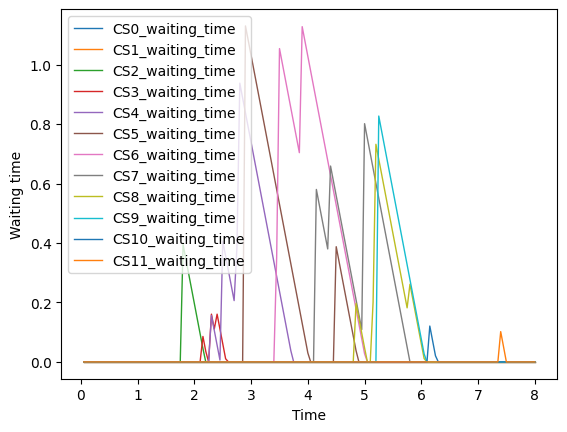

In [59]:

columns = []
for i in range(env.num_cs):
    columns.append('CS{}_waiting_time'.format(i))
plt.plot(
    time, df_cs[columns], label=columns, 
    linewidth=1
    )
plt.xlabel('Time')
plt.ylabel('Waiting time')
plt.legend()

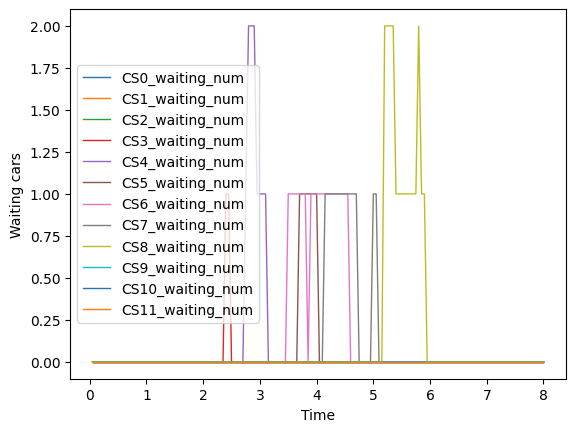

In [60]:
columns = []
for i in range(env.num_cs):
    columns.append('CS{}_waiting_num'.format(i))
plt.plot(
    time, df_cs[columns], label=columns,
    linewidth=1
    )
plt.xlabel('Time')
plt.ylabel('Waiting cars')
plt.legend()

EV

In [61]:
df_ev = pd.read_csv(dir+'/EV/EV0.csv')
time = df_ev['time']

Text(0, 0.5, 'Distance')

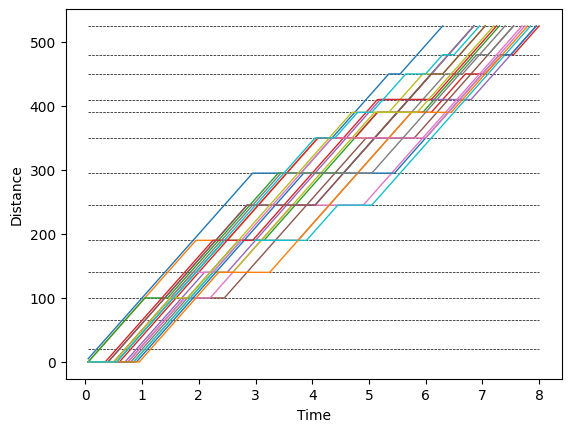

In [62]:
dis = 0
route = env.route
adj_route = []
for d in route:
    dd = math.ceil(d / 5)
    adj_route.append(dd * 5)
for d in adj_route:
    dis += d
    p = []
    for _ in total_time:
        p.append(dis)
    plt.plot(
        total_time, p, label='CS'+str(i),
        linestyle="--", c='black',
        linewidth=0.5
        )
for i, file in enumerate(os.listdir(dir+'/EV')):
    df_ev = pd.read_csv(dir+'/EV/'+file)
    time_ = df_ev['time']
    columns = ['distance']
    plt.plot(
        time_, df_ev[columns], label=i,
        linewidth=1
        )
plt.xlabel('Time')
plt.ylabel('Distance')
# plt.legend()

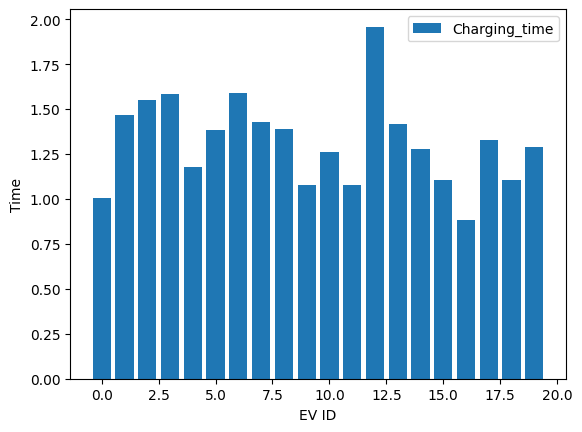

In [63]:
df_ev_g = pd.read_csv(dir+'/EV_g.csv')
ev = df_ev_g['EV']
plt.bar(
    ev, df_ev_g['Charging_time'], label='Charging_time', 
    linewidth=1
    )
plt.xlabel('EV ID')
plt.ylabel('Time')
plt.legend()

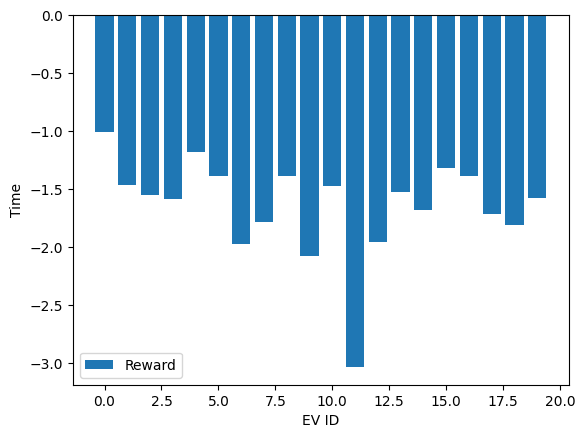

In [64]:
df_ev_g = pd.read_csv(dir+'/EV_g.csv')
ev = df_ev_g['EV']
plt.bar(
    ev, df_ev_g['Reward'], label='Reward', 
    linewidth=1
    )
plt.xlabel('EV ID')
plt.ylabel('Time')
plt.legend()

In [65]:
env.agents[15].ideal_conditions()

Ideal charging SOC: 0.43749999999999967%   Ideal charging time: 1.0937499999999991h   Ideal charging times: 1


In [66]:
action_list = env.action_list

Text(0, 0.5, 'EV SOC (%)')

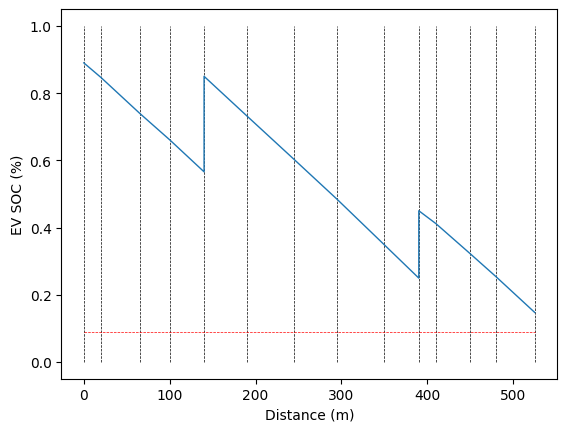

In [67]:
ev_id = 19
df_ev = pd.read_csv(dir+'/EV/EV{}.csv'.format(ev_id))
init_soc = env.agents[ev_id].SOC_init
exp_soc = env.agents[ev_id].SOC_exp
dis = [0]
soc = [init_soc]

i = 0
while i < df_ev.shape[0]:
    if df_ev.iloc[i]['position'] % 2 == 0:
        if df_ev.iloc[i]['state'] == 0:
            dis.append(df_ev.iloc[i]['distance']) # type: ignore
            soc.append(df_ev.iloc[i]['SOC'])
        elif df_ev.iloc[i]['state'] == 2:
            dis.append(df_ev.iloc[i]['distance']) # type: ignore
            soc.append(action_list[int(df_ev.iloc[i]['action'])]) # type: ignore
            while df_ev.iloc[i]['state'] != 0:
                i += 1
    i += 1

cs_dis = 0
for d in [0] + adj_route:
    cs_dis += d
    plt.plot(
        [cs_dis, cs_dis], [0, 1], label='CS'+str(i),
        linestyle="--", c='black',
        linewidth=0.5
        )

plt.plot(
    [0, cs_dis], [exp_soc, exp_soc], label='CS'+str(i),
    linestyle="--", c='red',
    linewidth=0.5
    )

plt.plot(
    dis, soc,
    linewidth=1
    )

plt.xlabel('Distance (m)')
plt.ylabel('EV SOC (%)')

In [68]:
env.agents[ev_id].ideal_conditions()

Ideal charging SOC: 0.4274999999999999%   Ideal charging time: 1.0687499999999996h   Ideal charging times: 1


Text(0, 0.5, 'EV SOC (%)')

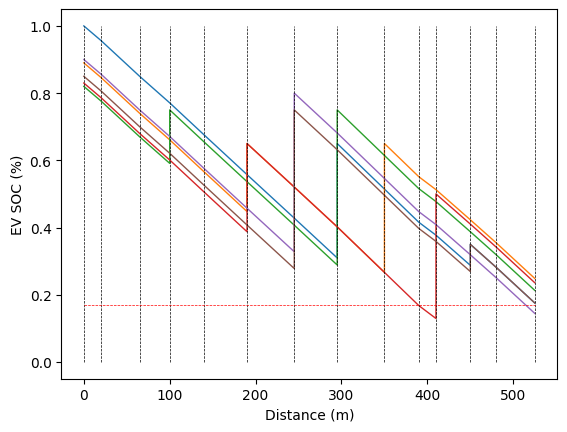

In [69]:
for ev_id in range(0, 6):
    df_ev = pd.read_csv(dir+'/EV/EV{}.csv'.format(ev_id))
    init_soc = env.agents[ev_id].SOC_init
    exp_soc = env.agents[ev_id].SOC_exp
    dis = [0]
    soc = [init_soc]

    i = 0
    while i < df_ev.shape[0]:
        if df_ev.iloc[i]['position'] % 2 == 0:
            if df_ev.iloc[i]['state'] == 0:
                dis.append(df_ev.iloc[i]['distance']) # type: ignore
                soc.append(df_ev.iloc[i]['SOC'])
            elif df_ev.iloc[i]['state'] == 2:
                dis.append(df_ev.iloc[i]['distance']) # type: ignore
                soc.append(action_list[int(df_ev.iloc[i]['action'])]) # type: ignore
                while df_ev.iloc[i]['state'] != 0:
                    i += 1
        i += 1

    plt.plot(
        dis, soc,
        linewidth=1
        )

cs_dis = 0
for d in [0] + adj_route:
    cs_dis += d
    plt.plot(
        [cs_dis, cs_dis], [0, 1], label='CS'+str(i),
        linestyle="--", c='black',
        linewidth=0.5
        )

plt.plot(
    [0, cs_dis], [exp_soc, exp_soc], label='CS'+str(i),
    linestyle="--", c='red',
    linewidth=0.5
    )

plt.xlabel('Distance (m)')
plt.ylabel('EV SOC (%)')